# Data set Context

The binary classification goal of this Dataset is to predict if the client will subscribe a bank term deposit (variable y).

- Number of Instances: 41188 

- Number of Attributes: 20 + output attribute.

- Attribute Details:

1 - age (numeric)   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed", "services","student","technician", "unemployed","unknown")   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")   
   5 - default: has credit in default? (categorical: "no","yes","unknown")   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
**related with the last contact of the current campaign:** 

   8 - contact: contact communication type (categorical: "cellular","telephone")   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - duration: last contact duration,in seconds (numeric).**Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**
  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   
**social and economic context attributes**  
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
  20 - nr.employed: number of employees - quarterly indicator (numeric)
  
  Output variable (desired target):  
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

- Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


# Task  : 
In this project we investigate the relationship between Client's choice to subscribe for a Term Deposit and Mulitple Features. Also we **predict if Client Subscribed a Term Deposit or not based on multiple features**.

# Imorting All Required Packages or Modules

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn import metrics

**Importing Data Set** : 
Importing dataset from downloaded file on System using Pandas package

In [245]:
data = pd .read_csv( "C:\\Users\\SS\\Downloads\\MDS Course files\\Projects\\Data Sets\\bank-additional Class\\bank-additional-full.csv" ,sep=';')

In [246]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In this Dataset y/target feature says **"Client Subscribed a Term Deposit or not"**

This Shows Data has 21 columns. But we dont know the no. of entries. So, We find **SHAPE** of the data

In [247]:
data .shape

(41188, 21)

This dataset has **41188 enteries/rows** and **21 features/columns**

### Info on features/columns of the Data set

In [248]:
data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Result of this code shows 5 features are of float data type , 5 are of int data type and 11 are objects.

### Statistical Information of the Data set

In [249]:
data .describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


as we can in some features max values is far greater than 75% value. which shows there are some outliers. Also Range of all features are Different.
To Ractify this Problem we use **Feature Scaling** later in this Project.

# Null Values


As Mentioned in Dataset Context, Null values are only present ion Categorical Features as unknown.

In [250]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

clearly this code also shows same.

# Correlation between continuous valued features

In [251]:
cont_features = data.select_dtypes(exclude=['object'])

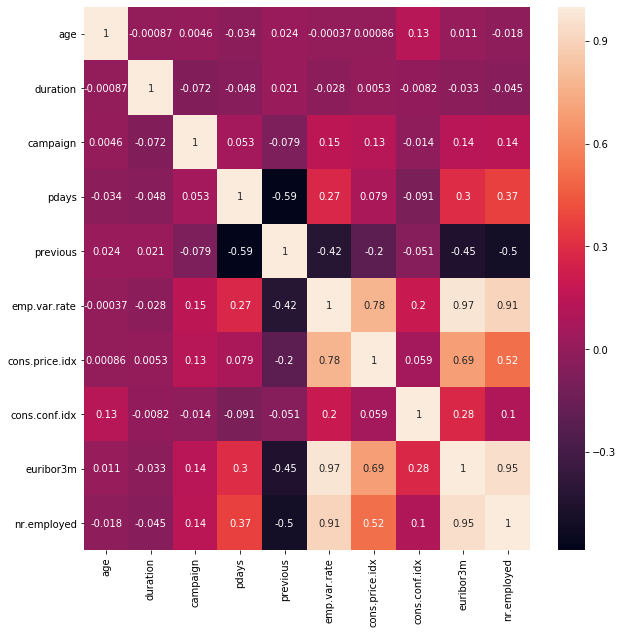

In [252]:
plt.figure(figsize=(10,10))
sns.heatmap(data=cont_features.corr(method='pearson'), annot=True)
plt.show()

There are many Features with continuous values which are highly correlated with other features.

But we can not select features on the basis of correlation because target feature is a categorical. So, we do Feature Selection on basis of Anova.

# Data Visualization

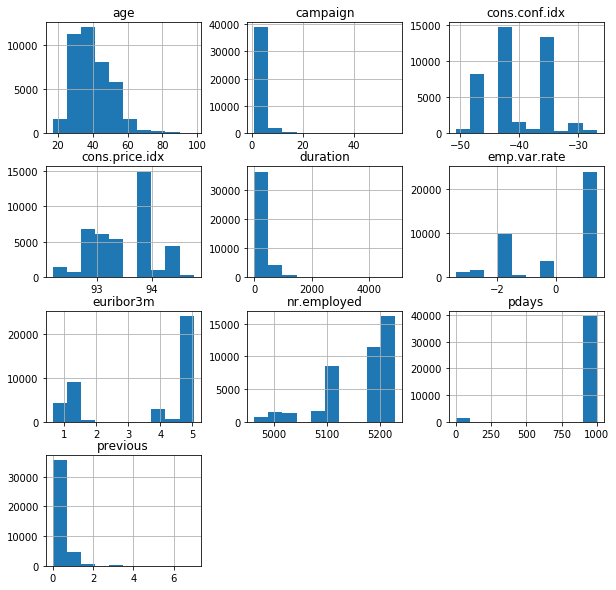

In [253]:
data.hist(figsize=(10,10))
plt.show()

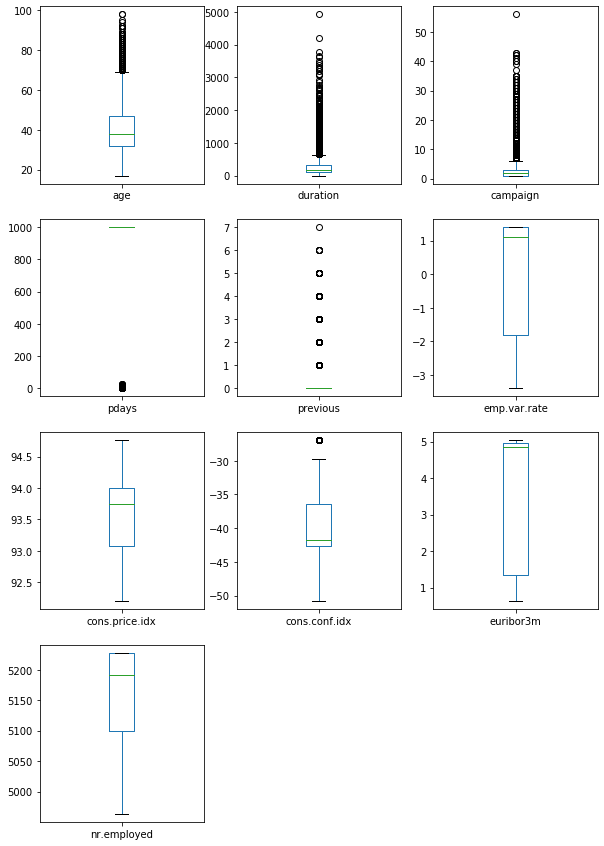

In [254]:
cont_features.plot(kind='box', layout=(4,3), subplots=True, figsize=(10,15))
plt.show()

Clearly From above Box plots, we there are many outliers is 4-5 features and all features have different range.

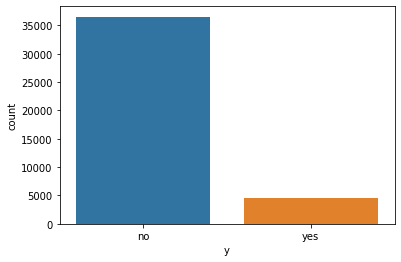

In [255]:
sns.countplot(data['y'])
plt.show()

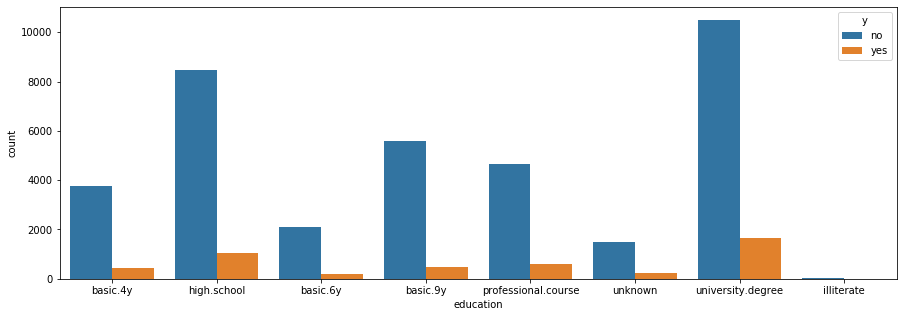

In [256]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'education', hue='y', data = data)
plt.show()

### People with University Degree Subscribed more for a Term Deposit.

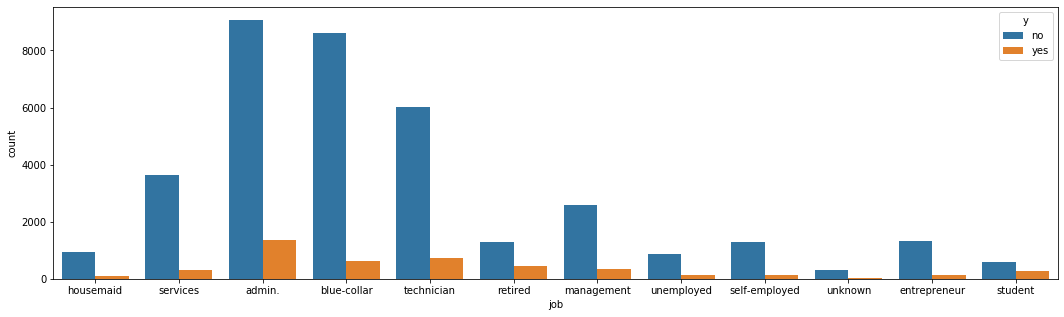

In [257]:
plt.figure(figsize=(18,5))
sns.countplot(x = 'job', hue='y', data = data)
plt.show()

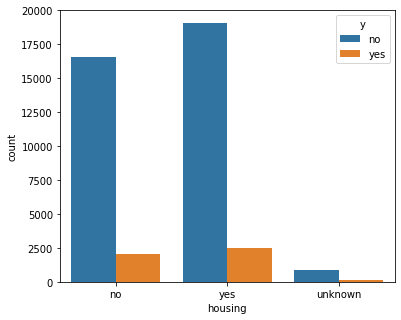

In [258]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'housing', hue='y', data = data)
plt.show()

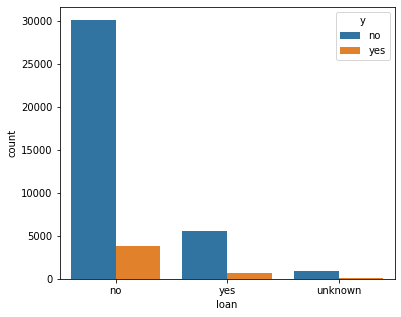

In [259]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'loan', hue='y', data = data)
plt.show()

### People who has housing loan on them subscribed more for a Term Depopsit and People who has no Personal Loan subscribed more for Term Deposit.

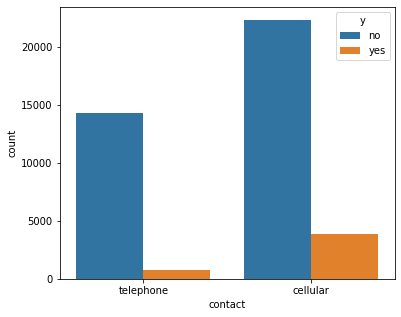

In [260]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'contact', hue='y', data = data)
plt.show()

### People Contacted on Cellular phopne subscribed more for Term Deposit.

# Data Preprocessing

## =>Feature Selection
We only have 10 features with continuous values. But we try to find some top features which affects the target feature.

In [261]:
ds_continus_val = pd.concat([cont_features,data['y']],axis=1)

In [262]:
ds_continus_val.shape

(41188, 11)

In [263]:
features = ds_continus_val.loc[: , ds_continus_val.columns != 'y']

In [264]:
target = ds_continus_val.loc[: , ds_continus_val.columns == 'y']

### For Feature Selection we use Annova function in SelectKBest 

we import some function from modules of some packages

In [265]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

In [266]:
bestfeatures = SelectKBest(score_func=f_classif, k = 'all')

In [267]:
fit = bestfeatures.fit(features,target)
feature_scores = pd.DataFrame(fit.scores_)
feature_scores.head()

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,38.094659
1,8094.101634
2,182.156673
3,4861.173272
4,2304.257088


In [268]:
feature_column_name=pd.DataFrame(features.columns)
feature_score_df = pd.concat([feature_column_name,feature_scores],axis=1)
feature_score_df.columns=['Features','Score']
feature_score_df

,Features,Score
0,age,38.094659
1,duration,8094.101634
2,campaign,182.156673
3,pdays,4861.173272
4,previous,2304.257088
5,emp.var.rate,4023.829925
6,cons.price.idx,778.589795
7,cons.conf.idx,124.409975
8,euribor3m,4309.479048
9,nr.employed,5926.610601


Clearly from above dataframe, among 10 features we have 3 features of low score that means it is less likely to affect our target features.

### Top 7 Features with best scores

In [269]:
print(feature_score_df.nlargest(7,'Score'))

         Features        Score
1        duration  8094.101634
9     nr.employed  5926.610601
3           pdays  4861.173272
8       euribor3m  4309.479048
5    emp.var.rate  4023.829925
4        previous  2304.257088
6  cons.price.idx   778.589795


## =>Model Dataset

In [270]:
model_DS = data[['nr.employed' , 'pdays' , 'euribor3m' , 'emp.var.rate' ,
                               'previous' , 'cons.price.idx' , 'y']]
model_DS .head()

,nr.employed,pdays,euribor3m,emp.var.rate,previous,cons.price.idx,y
0,5191.0,999,4.857,1.1,0,93.994,no
1,5191.0,999,4.857,1.1,0,93.994,no
2,5191.0,999,4.857,1.1,0,93.994,no
3,5191.0,999,4.857,1.1,0,93.994,no
4,5191.0,999,4.857,1.1,0,93.994,no


In [271]:
model_DS.nunique()

nr.employed        11
pdays              27
euribor3m         316
emp.var.rate       10
previous            8
cons.price.idx     26
y                   2
dtype: int64

In [272]:
model_DS.describe()

,nr.employed,pdays,euribor3m,emp.var.rate,previous,cons.price.idx
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,5167.035911,962.475454,3.621291,0.081886,0.172963,93.575664
std,72.251528,186.910907,1.734447,1.570960,0.494901,0.578840
min,4963.600000,0.000000,0.634000,-3.400000,0.000000,92.201000
25%,5099.100000,999.000000,1.344000,-1.800000,0.000000,93.075000
50%,5191.000000,999.000000,4.857000,1.100000,0.000000,93.749000
75%,5228.100000,999.000000,4.961000,1.400000,0.000000,93.994000
max,5228.100000,999.000000,5.045000,1.400000,7.000000,94.767000


## =>Extracting Dependent and Independent Feature from Data set

-> Dependent Feature/Variable, y = Client Subscribed a Term Deposit or not (y)

-> Independent Feature/Variable, x = Multiple Features

In [273]:
x = model_DS[['nr.employed' , 'pdays' , 'euribor3m' , 'emp.var.rate' ,
                               'previous' , 'cons.price.idx' ]] .values
y = model_DS['y'] .values

In [274]:
print( x[0:5] )
print( f"Shape of Independent(x) variable is { x.shape }" )

[[5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00 0.0000e+00 9.3994e+01]
 [5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00 0.0000e+00 9.3994e+01]
 [5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00 0.0000e+00 9.3994e+01]
 [5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00 0.0000e+00 9.3994e+01]
 [5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00 0.0000e+00 9.3994e+01]]
Shape of Independent(x) variable is (41188, 6)


In [275]:
print( y[0:5] )
print( f"Shape of Dependent(y) variable is { y.shape }" )

['no' 'no' 'no' 'no' 'no']
Shape of Dependent(y) variable is (41188,)


Clearly Target feature has character values. For Modeling we convert them into numerical catagorical value using LabelEncoder.

In [276]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(['yes','no'])
y=le.transform(y)
y[0:5]

array([0, 0, 0, 0, 0])

## => Feature Scaling

As said above, here we do **Feature Scaling**!

We use **standard scalar** from **preprocessing** module to rescale all features.

In [277]:
x = preprocessing.RobustScaler().fit(x).transform(x)
x[0:5] 

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26659412],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26659412],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26659412],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26659412],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26659412]])

### Now we split our data in train and test using train_test_split function

In [278]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2,random_state=4)

In [279]:
print("Size of Train and Test Varibales. ")
print()
print( f"Size of train_x : {x_train .shape} and test_x : {x_test .shape}" )
print( f"Size of train_y : {y_train .shape} and test_y : {y_test .shape}" )

Size of Train and Test Varibales. 

Size of train_x : (32950, 6) and test_x : (8238, 6)
Size of train_y : (32950,) and test_y : (8238,)


# -> Now we Make Models only on basis of only continuous(Numeric) Features

# 1). Logistic Regression Algorithm

### First We import Logistic Regression model from linear_model Module

In [280]:
from sklearn import linear_model
Logestic_Reg = linear_model .LogisticRegression(C=0.01,solver='liblinear')

###  fit Logestic_Reg model 

In [281]:
Logestic_Reg .fit( x_train , y_train )

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Logestic_Reg Model is ready.

In [282]:
LRPred = Logestic_Reg.predict(x_test)
LR_compared_val  = pd.DataFrame({'Actual values':y_test,'Predicted values': LRPred})
LR_compared_val.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


# Evaluation of Logestic_Reg Model

In [283]:
Logestic_Reg.score( x_train , y_train )

0.8982094081942337

In [284]:
LR_as = metrics.accuracy_score( y_test, LRPred )
LR_as

0.8983976693372178

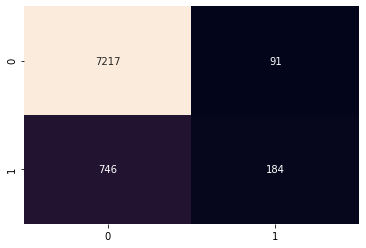

In [285]:
sns.heatmap(confusion_matrix(y_test, LRPred), annot=True, cbar=False,  fmt='0.0f' )
plt.show()

In [286]:
print(classification_report(y_test , LRPred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.67      0.20      0.31       930

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



# 2). K- Nearest Neighbour Algorithm

### We import KNeighborsClassifier model from neighbors Module

To do modeling we have to take some value of k.
let k = 1

In [287]:
from sklearn.neighbors import KNeighborsClassifier

k = 1
KNN_class = KNeighborsClassifier( n_neighbors=k )

### we fit KNN_class model using train set

In [288]:
KNN_class.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Now Model is ready.

In [289]:
KPred = KNN_class.predict(x_test)

In [290]:
KNN_compared_val = pd.DataFrame({'Actual values':y_test,'Predicted values':KPred})
KNN_compared_val.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


In [291]:
metrics.accuracy_score( y_test, KPred )

0.8267783442583151

For better accuracy_score we **repeat this algorithm for k = 1 to k = 10**

We just find accuracy score and decide for which value of k our KNN model is best.

In [292]:
Ks = 10
mean_acc = np.zeros((Ks))

for n in range(1,Ks+1):
    KnN = KNeighborsClassifier( n_neighbors = n ).fit(x_train,y_train)
    KPred_y = KnN.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test , KPred_y)

In [293]:
print(f"Mean Accuracy for k=1 to 10 : {mean_acc}")

Mean Accuracy for k=1 to 10 : [0.82677834 0.8627094  0.86076718 0.8937849  0.89305657 0.89512017
 0.89512017 0.89524156 0.89475601 0.89524156]


In [294]:
print( "The best accuracy is", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy is 0.895241563486283 with k = 8


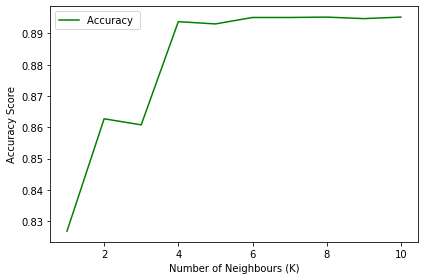

In [295]:
plt.plot(range(1,Ks+1),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

## From above graph, its clear Best accuracy of this model is for k = 8 and lowest accuracy is for k =  1.

Also, After k=6 the accuracy score is become steady.

# 3). Decision Tree Algorithm

### import DecisionTreeClassifier model from tree Module

In [296]:
from sklearn.tree import DecisionTreeClassifier
D_Tre = DecisionTreeClassifier( criterion = 'entropy' , max_depth = 7 )

### fit D_Tre model

In [297]:
D_Tre.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Model is ready.

In [298]:
DTPred = D_Tre.predict(x_test)

DT_compared_val = pd.DataFrame({'Actual values':y_test,'Predicted values':DTPred})
DT_compared_val.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


# Evaluation 

In [299]:
D_Tre.score(x_test , y_test)

0.8991260014566642

In [300]:
DT_as = metrics.accuracy_score( y_test , DTPred )
DT_as

0.8991260014566642

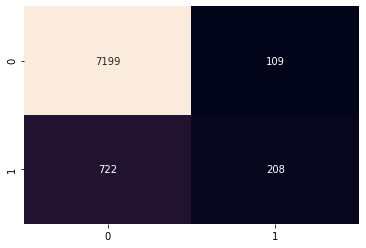

In [301]:
sns.heatmap(confusion_matrix(y_test , DTPred), annot=True, cbar=False,  fmt='0.0f' )
plt.show()

In [302]:
print(classification_report(y_test , DTPred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.66      0.22      0.33       930

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



# 4). Decision tree using Id3Estimator

### import Id3Estimator model from id3 Package

In [303]:
from id3 import Id3Estimator
estimator = Id3Estimator()

### Now we fit using train set

In [304]:
ID3_DT = estimator.fit(x_train , y_train)

### Now Model is ready.

In [305]:
ID3Pred = ID3_DT.predict( x_test )

In [306]:
ID3_compared_val = pd.DataFrame({'Actual values':y_test,'Predicted values':ID3Pred})
ID3_compared_val.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


# Evaluation of Model

In [307]:
ID3_as = metrics.accuracy_score(y_test , ID3Pred)
ID3_as

0.8994901675163874

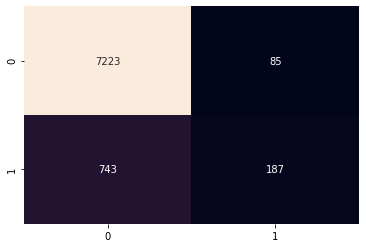

In [308]:
sns.heatmap(confusion_matrix(y_test , ID3Pred), annot = True, cbar = False,  fmt = '0.0f' )
plt.show()

In [309]:
print(classification_report(y_test , ID3Pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.69      0.20      0.31       930

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



# 4). Support Vector Machine (SVM)

### import svm Module from sklearn Package

In [310]:
from sklearn import svm

we need to import Support Vector Classifier (SVC) with radial basis function (rbf) kernel

In [311]:
SVM = svm.SVC(kernel = 'rbf')

In [312]:
SVM.fit( x_train , y_train ) 

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### SVM Model is ready

In [313]:
SVMPred = SVM.predict(x_test)

In [314]:
SVM_compared_val = pd.DataFrame({'Actual values':y_test,'Predicted values':SVMPred})
SVM_compared_val.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


# Evaluation

In [315]:
SVM_as = metrics.accuracy_score( y_test , SVMPred )
SVM_as

0.8982762806506434

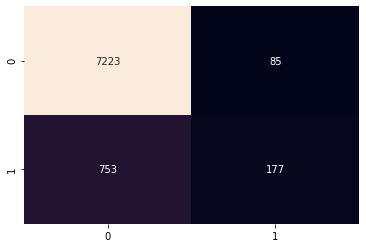

In [316]:
sns.heatmap(confusion_matrix(y_test , SVMPred), annot = True, cbar = False,  fmt = '0.0f' )
plt.show()

In [317]:
print(classification_report(y_test , SVMPred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.68      0.19      0.30       930

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



# 5). Random Forest

### we import RandsomForestClassifier function from module ensemble from Package sklearn

In [318]:
from sklearn.ensemble import RandomForestClassifier

Now we Build a RFC_class model

In [319]:
RF_class = RandomForestClassifier(criterion = 'entropy', max_depth = 50, max_features = None, n_estimators = 10, random_state = 50 )

### fit the Model

In [320]:
RF_class.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

### Now Model is ready.

In [321]:
RFCPred = RF_class.predict(x_test)

In [322]:
RFC_compared_val = pd.DataFrame({'Actual values':y_test,'Predicted values':RFCPred})
RFC_compared_val.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


# Evaluation of RF_class Model

In [323]:
RFC_as = metrics.accuracy_score(y_test,RFCPred)
RFC_as

0.8942704539936878

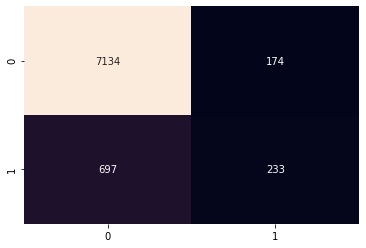

In [324]:
sns.heatmap(confusion_matrix(y_test,RFCPred), annot = True, cbar = False,  fmt = '0.0f' )
plt.show()

In [325]:
print(classification_report(y_test , RFCPred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.57      0.25      0.35       930

    accuracy                           0.89      8238
   macro avg       0.74      0.61      0.65      8238
weighted avg       0.87      0.89      0.88      8238



# 6). Naive Bayes Classifier

We use Bernoulli Naive Bayes Classifier because this is a binary classififcation problem.

In [326]:
from sklearn.naive_bayes import BernoulliNB
BNB_class = BernoulliNB()

In [327]:
BNB_class.fit(x_train , y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### Model is Ready

In [328]:
BNBPred = BNB_class.predict(x_test)
BNB_compared_val = pd.DataFrame({'Actual values' : y_test,'Predicted values' : BNBPred})
BNB_compared_val.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


# Evaluation

In [329]:
BNB_class.score(x_train,y_train)

0.8350531107738999

In [330]:
BNB_as = metrics.accuracy_score(y_test , BNBPred)
BNB_as

0.8430444282592863

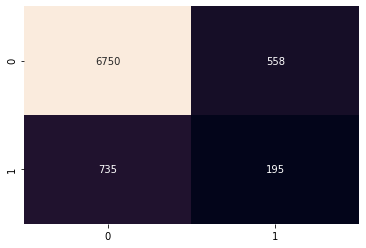

In [331]:
sns.heatmap(confusion_matrix(y_test , BNBPred), annot = True, cbar = False,  fmt = '0.0f' )
plt.show()

In [332]:
print(classification_report(y_test , BNBPred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7308
           1       0.26      0.21      0.23       930

    accuracy                           0.84      8238
   macro avg       0.58      0.57      0.57      8238
weighted avg       0.83      0.84      0.84      8238



# Accuracy Score's Dataframe

In [333]:
cof_model_scores = pd.DataFrame([LR_as*100, mean_acc.max()*100, DT_as*100, ID3_as*100, SVM_as*100, RFC_as*100, BNB_as*100], 
                      index=['Logistic Regression Model', 'KNN Model', 'Decision Tree Model ', 'ID3 Estimator', 
                             'Support Vector Machine', 'Random Forest Classifier', 'Bernoulli Naive Bayes'],
                      columns=['Accuracy Score'])
cof_model_scores

,Accuracy Score
Logistic Regression Model,89.839767
KNN Model,89.524156
Decision Tree Model,89.912600
ID3 Estimator,89.949017
Support Vector Machine,89.827628
Random Forest Classifier,89.427045
Bernoulli Naive Bayes,84.304443


# Interpretation

Clearly from Accuracy Score Table, **All Models have almost same Score**. But model with top score 89.95% is  **ID3 Estimator** for Categorical features.

# -> Now we try to Modelize the Dataset by only categorical Features.

Extract Categorical Features from Dataset.

In [334]:
categorical_features = data.select_dtypes(include=['object'])

In [335]:
categorical_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [336]:
cat_features = categorical_features.loc[:,categorical_features.columns!='y']
cat_features.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


#### As said in Dataset Context, there are unklnown values in some cells of Dataset which are said to be empty.

So, First we replace unknown values with numpy's nan value.

In [337]:
cat_features = cat_features.replace('unknown',np.nan,regex=True)
cat_features.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


### Since Dataset is not too large we can't drop rows with NaN values. So, we fill NaN values with mode of the whole column.

In [338]:
for column in cat_features.columns:
    mode = cat_features[column].mode()[0]
    cat_features[column] = cat_features[column].fillna(mode)

In [339]:
cat_features.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [340]:
# Converting Data type from object to Category
for col_name in cat_features.columns:
    cat_features[col_name] = cat_features[col_name].astype('category')

In [341]:
cat_features.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent


# Feature Preprocessing

## => Feature Selection
Since these Features are categorical and target is also categorical. We use **Chi square** function.

In [342]:
from sklearn import preprocessing
cat_features = cat_features.apply( preprocessing.LabelEncoder().fit_transform )
cat_features.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,0,0,0,1,6,1,1


In [343]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [344]:
best_features = SelectKBest(score_func = chi2 , k = 'all')

In [345]:
cat_fit = best_features.fit(cat_features,target)
Categorical_f_score = pd.DataFrame(cat_fit.scores_)
Categorical_f_score.head()

,0
0,92.665165
1,26.985669
2,157.908817
3,0.380869
4,2.288285


In [346]:
category_f_col_name = pd.DataFrame(cat_features.columns)
best_categorical_f = pd.concat([category_f_col_name , Categorical_f_score] , axis = 1)
best_categorical_f.columns = ['Features' , 'Score']
best_categorical_f

,Features,Score
0,job,92.665165
1,marital,26.985669
2,education,157.908817
3,default,0.380869
4,housing,2.288285
5,loan,0.696920
6,contact,547.958309
7,month,1.927284
8,day_of_week,10.231445
9,poutcome,98.231174


In [347]:
best_categorical_f = best_categorical_f.sort_values(by = 'Score' , ascending = False)

In [348]:
best_categorical_f = best_categorical_f.reset_index()
best_categorical_f = best_categorical_f.drop("index",axis = 1)
best_categorical_f

,Features,Score
0,contact,547.958309
1,education,157.908817
2,poutcome,98.231174
3,job,92.665165
4,marital,26.985669
5,day_of_week,10.231445
6,housing,2.288285
7,month,1.927284
8,loan,0.696920
9,default,0.380869


### Clearly from the dataframe, only top 4 features have quite some score.
So, we use only top 4 Features in our Datadet

In [349]:
temp_df = cat_features[['contact' , 'poutcome' , 'education' , 'job']]
temp_df.head()

,contact,poutcome,education,job
0,1,1,0,3
1,1,1,3,7
2,1,1,3,7
3,1,1,1,0
4,1,1,3,7


## => Model Dataset

In [350]:
model_data = pd.concat([temp_df , data['y']],axis=1,sort = True)
model_data .head()

,contact,poutcome,education,job,y
0,1,1,0,3,no
1,1,1,3,7,no
2,1,1,3,7,no
3,1,1,1,0,no
4,1,1,3,7,no


## =>Feature Extraction for XX 
Since, target feature is same as of Continuous features case. So, we dont extract it in some new variable we just use it here.

In [352]:
XX = model_data[['education' , 'contact' , 'poutcome' , 'job']] .values

In [353]:
print( XX[0:5] )
print( f"Shape of Independent(x) variable is { XX.shape }" )

[[0 1 1 3]
 [3 1 1 7]
 [3 1 1 7]
 [1 1 1 0]
 [3 1 1 7]]
Shape of Independent(x) variable is (41188, 4)


In [354]:
print( y[0:5] )
print( f"Shape of Dependent(y) variable is { YY.shape }" )

[0 0 0 0 0]
Shape of Dependent(y) variable is (41188,)


In [355]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split( XX , y , test_size = 0.2 , random_state = 4)

# 1). Logistic Regression

In [356]:
Lo_Reg = linear_model .LogisticRegression( C = 0.01 , solver = 'liblinear')

In [357]:
Lo_Reg .fit( Xtrain , Ytrain )

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Model is ready!

In [358]:
LRpred_Y = Lo_Reg.predict(Xtest)
LR_comp_df = pd.DataFrame({'Actual values':Ytest,'Predicted values':LRpred_Y})
LR_comp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [359]:
lr_as = metrics.accuracy_score( Ytest , LRpred_Y)
lr_as

0.8871085214857976

# 2). KNN Classifier

In [360]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)

In [361]:
knn.fit(Xtrain , Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**knn Model** is ready!

In [362]:
kpred_Y = knn.predict(Xtest)

In [363]:
Kcomp_df = pd.DataFrame({'Actual values':Ytest , 'Predicted values': kpred_Y})
Kcomp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


Accuracy Score of the **knn model** at K=1

In [364]:
metrics.accuracy_score(Ytest,kpred_Y)

0.8148822529740228

In [365]:
Ks = 10
mean_acc_ = np.zeros((Ks))

for n in range(1,Ks+1):
    KnN1 = KNeighborsClassifier(n_neighbors=n).fit(Xtrain,Ytrain)
    KPred_Y = KnN1.predict(Xtest)
    mean_acc_[n-1] = metrics.accuracy_score(Ytest,KPred_Y)

In [366]:
print(f"Mean Accuracy for k=1 to 10 : {mean_acc_}")

Mean Accuracy for k=1 to 10 : [0.81488225 0.88103909 0.88722991 0.89354212 0.89463462 0.89317796
 0.89281379 0.89584851 0.89718378 0.8959699 ]


### Plot of accuracy_score of KNN classifier for k=1 to k=10

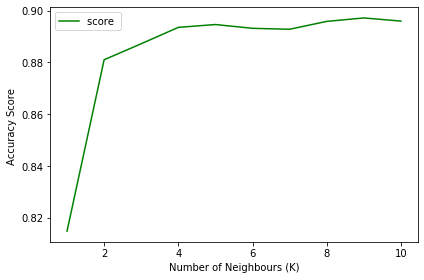

In [367]:
plt.plot(range(1,Ks+1),mean_acc_,'g')
plt.legend(('score ', '+/- 3xstd'))
plt.ylabel('Accuracy Score ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [368]:
print( "The best accuracy is", mean_acc_.max(), "with k =", mean_acc_.argmax()+1) 

The best accuracy is 0.8971837824714737 with k = 9


KNN Classifier model give almost same accuracy score for all value of K. Also after k=7 it got steady.
However maximum accuracy score is for k=9.

# 3). Decision Tree Classifier

In [369]:
d_tre = DecisionTreeClassifier(criterion='entropy' , max_depth=4)

In [370]:
d_tre.fit(Xtrain , Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Model is ready!

In [371]:
dtpred_Y = d_tre.predict(Xtest)
dt_comp_df = pd.DataFrame({'Actual values':Ytest , 'Predicted values':dtpred_Y})
dt_comp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [372]:
dt_as = metrics.accuracy_score(Ytest , dtpred_Y)
dt_as

0.8976693372177713

# 4). Decision tree using Id3Estimator

In [373]:
estimator2 = Id3Estimator()

In [374]:
i_dt = estimator2.fit(Xtrain , Ytrain)

Model is ready!

In [375]:
idtpred_Y = i_dt.predict(Xtest)
idt_comp_df = pd.DataFrame({'Actual values':Ytest , 'Predicted values':idtpred_Y})
idt_comp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [376]:
idt_as = metrics.accuracy_score(Ytest,idtpred_Y)
idt_as

0.8977907259043457

# 5). Support Vector Machine (SVM)

In [377]:
sVm = svm.SVC(kernel='rbf')

In [378]:
sVm.fit(Xtrain , Ytrain) 

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

**sVm** model is ready now! 

In [379]:
svmpred_Y = sVm.predict(Xtest)
svm_comp_df = pd.DataFrame({'Actual values':Ytest , 'Predicted values':svmpred_Y})
svm_comp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [380]:
svm_as = metrics.accuracy_score(Ytest , svmpred_Y)
svm_as

0.8977907259043457

# 6). Random Forest

In [381]:
RFC = RandomForestClassifier(criterion='entropy', max_depth=50, max_features=None, n_estimators= 10, random_state= 50 )

In [382]:
RFC.fit(Xtrain , Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

Now, Model is Ready!

In [383]:
rfcpred_Y = RFC.predict(Xtest)
rfc_comp_df = pd.DataFrame({'Actual values':Ytest,'Predicted values':rfcpred_Y})
rfc_comp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [384]:
rfc_as = metrics.accuracy_score(Ytest , rfcpred_Y)
rfc_as

0.8973051711580481

# 7). Bernoulli Naive Bayes

In [385]:
bnby = BernoulliNB()

In [386]:
bnby.fit(Xtrain , Ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

**bnby Model** is Ready!

In [387]:
bnbpred_Y = bnby.predict(Xtest)
bnb_comp_df = pd.DataFrame({'Actual values' : Ytest,'Predicted values' : bnbpred_Y})
bnb_comp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [388]:
bnb_as = metrics.accuracy_score(Ytest , bnbpred_Y)
bnb_as

0.8871085214857976

# Accuracy Score's Dataframe

In [389]:
caf_model_scores = pd.DataFrame([lr_as*100, mean_acc_.max()*100, dt_as*100, idt_as*100, svm_as*100, rfc_as*100, bnb_as*100], 
                      index=['Logistic Regression Model', 'KNN Model', 'Decision Tree Model ', 'ID3 Estimator', 
                             'Support Vector Machine', 'Random Forest Classifier', 'Bernoulli Naive Bayes'],
                      columns=['Accuracy Score'])
caf_model_scores

,Accuracy Score
Logistic Regression Model,88.710852
KNN Model,89.718378
Decision Tree Model,89.766934
ID3 Estimator,89.779073
Support Vector Machine,89.779073
Random Forest Classifier,89.730517
Bernoulli Naive Bayes,88.710852


# Conclusion

Clearly from Accuracy Score Table, **All Models have almost same Score**. But model with top score 89.78% is **again ID3 Estimator** for Categorical features.

# -> Now we try to Modelize the Dataset by top features of both categorical and continuous Features

# Feature Preprocessing

## => Feature Selection

Feature Selection on both Continuous and Categorical are already done. So, we just use them directly here and concat them in single Dataframe.

## => Model Dataset

In [390]:
model_data = pd.concat([temp_df , model_DS],axis=1,sort = True)
model_data .head()

,contact,poutcome,education,job,nr.employed,pdays,euribor3m,emp.var.rate,previous,cons.price.idx,y
0,1,1,0,3,5191.0,999,4.857,1.1,0,93.994,no
1,1,1,3,7,5191.0,999,4.857,1.1,0,93.994,no
2,1,1,3,7,5191.0,999,4.857,1.1,0,93.994,no
3,1,1,1,0,5191.0,999,4.857,1.1,0,93.994,no
4,1,1,3,7,5191.0,999,4.857,1.1,0,93.994,no


**Clearly Dataset is dealt with Nan value or say unknown. So we don't need to do anything here**

## =>Feature Extraction for X
Since, target feature is same as of Continuous features case. So, we dont need to extract it in some new variable we just use it here.

In [391]:
X = model_data[['education' , 'contact' , 'nr.employed' , 'pdays' , 'euribor3m' , 'emp.var.rate' ,
                               'previous' , 'cons.price.idx', 'poutcome' , 'job']] .values

In [392]:
print( X[0:5] )
print( f"Shape of Independent(x) variable is { X.shape }" )

[[0.0000e+00 1.0000e+00 5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00
  0.0000e+00 9.3994e+01 1.0000e+00 3.0000e+00]
 [3.0000e+00 1.0000e+00 5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00
  0.0000e+00 9.3994e+01 1.0000e+00 7.0000e+00]
 [3.0000e+00 1.0000e+00 5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00
  0.0000e+00 9.3994e+01 1.0000e+00 7.0000e+00]
 [1.0000e+00 1.0000e+00 5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00
  0.0000e+00 9.3994e+01 1.0000e+00 0.0000e+00]
 [3.0000e+00 1.0000e+00 5.1910e+03 9.9900e+02 4.8570e+00 1.1000e+00
  0.0000e+00 9.3994e+01 1.0000e+00 7.0000e+00]]
Shape of Independent(x) variable is (41188, 10)


In [393]:
print( y[0:5] )
print( f"Shape of Dependent(y) variable is { y.shape }" )

[0 0 0 0 0]
Shape of Dependent(y) variable is (41188,)


## =>Feature Scaling
Our Features have different ranges and also have some outliers as shown in EDA. So, we use **Robust Scaling** to scale our features 

In [394]:
X = preprocessing.RobustScaler().fit(X).transform(X)
X[0:5] 

array([[-0.75      ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.26659412,  0.        ,  0.14285714],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.26659412,  0.        ,  0.71428571],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.26659412,  0.        ,  0.71428571],
       [-0.5       ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.26659412,  0.        , -0.28571429],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.26659412,  0.        ,  0.71428571]])

In [395]:
xtrain , xtest , ytrain , ytest = train_test_split( X , y , test_size = 0.2 , random_state=4)

In [396]:
print("Size of Train and Test Varibales. ")
print()
print( f"Size of train_x : {xtrain .shape} and test_x : {xtest .shape}" )
print( f"Size of train_y : {xtrain .shape} and test_y : {ytest .shape}" )

Size of Train and Test Varibales. 

Size of train_x : (32950, 10) and test_x : (8238, 10)
Size of train_y : (32950, 10) and test_y : (8238,)


# (1). Logistic Regression

In [397]:
LoReg = linear_model .LogisticRegression( C = 0.01 , solver = 'liblinear')

In [398]:
LoReg .fit( xtrain , ytrain )

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Model is ready!

In [399]:
LRpred_y = LoReg.predict(xtest)
LRcomp_df = pd.DataFrame({'Actual values':ytest,'Predicted values':LRpred_y})
LRcomp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [400]:
lras = metrics.accuracy_score( ytest , LRpred_y)
lras

0.8985190580237922

# (2). KNN Classifier

In [401]:
k = 1
KNN = KNeighborsClassifier(n_neighbors=k)

In [402]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**KNN Model** is ready

In [403]:
kpred_y = KNN.predict(xtest)

In [404]:
kcomp_df = pd.DataFrame({'Actual values':ytest , 'Predicted values': kpred_y})
kcomp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


**Accuracy Score** of the KNN model at K=1

In [405]:
metrics.accuracy_score(ytest,kpred_y)

0.8424374848264142

In [406]:
Ks = 10
mean_acc_scr = np.zeros((Ks))

for n in range(1,Ks+1):
    KnN = KNeighborsClassifier(n_neighbors=n).fit(xtrain,ytrain)
    KPred_y = KnN.predict(xtest)
    mean_acc_scr[n-1] = metrics.accuracy_score(ytest,KPred_y)

In [407]:
print(f"Mean Accuracy for k=1 to 10 : {mean_acc_scr}")

Mean Accuracy for k=1 to 10 : [0.84243748 0.88905074 0.87642632 0.8915999  0.89232824 0.89548434
 0.89305657 0.89560573 0.89548434 0.89706239]


### Plot of accuracy_score of KNN classifier for k=1 to k=10

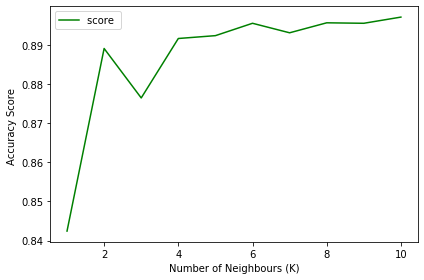

In [408]:
plt.plot(range(1,Ks+1),mean_acc_scr,'g')
plt.legend(('score ', '+/- 3xstd'))
plt.ylabel('Accuracy Score ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [409]:
print( "The best accuracy is", mean_acc_scr.max(), "with k =", mean_acc_scr.argmax()+1) 

The best accuracy is 0.8970623937848993 with k = 10


In this case accuracy score w.r.t to value of k varies all time. But we get maximum  accuracy score for k=10.

# (3). Decision Tree Classifier

In [410]:
dtre = DecisionTreeClassifier(criterion='entropy' , max_depth=10)

In [411]:
dtre.fit(xtrain , ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Now **dtre Model** is ready.

In [412]:
dtpred_y = dtre.predict(xtest)
dtcomp_df = pd.DataFrame({'Actual values':ytest , 'Predicted values':dtpred_y})
dtcomp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [413]:
dtre.score(xtrain,ytrain)

0.9115933232169955

In [414]:
dtas = metrics.accuracy_score(ytest , dtpred_y)
dtas

0.896698227725176

# (4). Decision tree using Id3Estimator

In [415]:
estimator3 = Id3Estimator()

In [416]:
idt = estimator3.fit(xtrain , ytrain)

Now **idt Model** is ready!

In [417]:
idtpred_y = idt.predict(xtest)
idtcomp_df = pd.DataFrame({'Actual values':ytest , 'Predicted values':idtpred_y})
idtcomp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [418]:
idtas = metrics.accuracy_score(ytest,idtpred_y)
idtas

0.8992473901432386

# (5). Support Vector Machine (SVM)

In [419]:
SVM = svm.SVC(kernel = 'rbf')

In [420]:
SVM.fit(xtrain,ytrain) 

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Now **SVM** Model is Ready!

In [421]:
svmpred_y = SVM.predict(xtest)
svmcomp_df = pd.DataFrame({'Actual values':ytest , 'Predicted values':svmpred_y})
svmcomp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [422]:
svmas = metrics.accuracy_score(ytest , svmpred_y)
svmas

0.8983976693372178

# (6). Random Forest

In [423]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=50, max_features=None, n_estimators= 10, random_state= 50 )

In [424]:
rfc.fit(xtrain , ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

**rfc Model** is ready now!

In [425]:
rfcpred_y = rfc.predict(xtest)
rfccomp_df = pd.DataFrame({'Actual values':ytest,'Predicted values':rfcpred_y})
rfccomp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [426]:
rfcas = metrics.accuracy_score(ytest , rfcpred_y)
rfcas

0.8879582422918184

# (7). Bernoulli Naive Bayes

In [427]:
bnb = BernoulliNB()

In [428]:
bnb.fit(xtrain , ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Now **bnb Model** is ready!

In [429]:
bnbpred_y = bnb.predict(xtest)
bnbcomp_df = pd.DataFrame({'Actual values' : ytest,'Predicted values' : bnbpred_y})
bnbcomp_df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


### Evaluation

In [430]:
bnbas = metrics.accuracy_score(ytest , bnbpred_y)
bnbas

0.8486283078417092

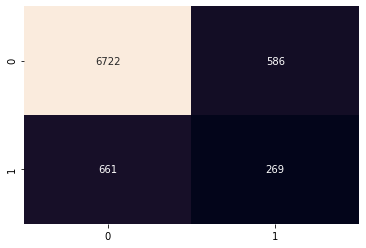

In [431]:
sns.heatmap(confusion_matrix(ytest , bnbpred_y), annot = True, cbar = False,  fmt = '0.0f' )
plt.show()

# Accuracy Score's Dataframe

In [432]:
ccf_model_scores = pd.DataFrame([lras*100, mean_acc_scr.max()*100, dtas*100, idtas*100, svmas*100, rfcas*100, bnbas*100], 
                      index=['Logistic Regression Model', 'KNN Model', 'Decision Tree Model ', 'ID3 Estimator', 
                             'Support Vector Machine', 'Random Forest Classifier', 'Bernoulli Naive Bayes'],
                      columns=['Accuracy Score'])
ccf_model_scores

,Accuracy Score
Logistic Regression Model,89.851906
KNN Model,89.706239
Decision Tree Model,89.669823
ID3 Estimator,89.924739
Support Vector Machine,89.839767
Random Forest Classifier,88.795824
Bernoulli Naive Bayes,84.862831


# Deduction

Clearly from Accuracy Score Table, **All Models have almost same Score**. Once again model with top score 89.92% is **ID3 Estimator**. This time it is for both Continuous and Categorical features.

# Comparision of ALL Accuracy Score's

In [243]:
df = pd.concat([cof_model_scores,caf_model_scores,ccf_model_scores],axis=1)
df.columns=['Continous Features','Categorical Features','Both Continuous and Categorical Features']
df

,Continous Features,Categorical Features,Both Continuous and Categorical Features
Logistic Regression Model,89.839767,88.710852,89.851906
KNN Model,89.524156,89.718378,89.706239
Decision Tree Model,89.912600,89.766934,89.669823
ID3 Estimator,89.949017,89.779073,89.924739
Support Vector Machine,89.827628,89.779073,89.839767
Random Forest Classifier,89.427045,89.730517,88.795824
Bernoulli Naive Bayes,84.304443,88.710852,84.862831


# Final Conclusion

Clearly in this Dataset using only Category Features does not help in increasing the accuracy of the Model nor taking Both together as in all Cases Accuracy Scores are Alomst Same.

Only Naive Bayes shows any varaition it increases when only categorical features are used but again it decreases when both are used together.But it is also noted that maximum accuaracy score of Naive Bayes with categorical feature is 5% less than ID3 Estimator in all Cases.

## So, Final Conclusion is use ID3 Estimator as it is gives maximum accuracy in all cases even if it is by litle margin.